In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("G:/Files/Data Science Bootcamp/Python/Group Assigmnent/train.csv")
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [130]:
df.shape

(36992, 25)

In [131]:
df.info()
# Based on the dataframe info the column "region_category", "preferred_offer_types" and "point_in_wallet" do seem to have null values. Further investigation is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

---

# Step 1: Data Cleaning & Preprocessing

In [132]:
df.drop_duplicates(inplace=True)
# drop duplicate items if there are any

In [133]:
df.isnull().sum()
# Assumption is correct! 

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

##### There are 3 different ways to handle missing data. The first one is accepting the missing data, the second one is deletion whether that be listwise deletion or pairwise deletion, and the last being imputation. For this case, the first and the second are not practical since we don't know how the missing values would impact the final result and can lead to significant loss of information for the second case. Deduction would dictate that imputation would be the right approach.

In [134]:
df['region_category'].value_counts()
# Since "region_category" is a categorical feature as the name suggests, mode imputaion is best to use in this case.

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [135]:
df['preferred_offer_types'].value_counts()
# "preferred_offer_types" categorical data subset with a normal distribution. Mode imputation will be used.

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [136]:
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['points_in_wallet'].fillna(df['points_in_wallet'].median(), inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

In [137]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

#### Lets delve deep into the data for some data cleaning

In [138]:
count = (df['referral_id'] == 'No referral').sum()
print(f"Count of 'No referral': {count}")

Count of 'No referral': 5


In [139]:
'''
A correlation can be seen between 'joined_through_referral' and 'referral_id' features. From the referral ID with 'xxxxxxxx' it can be deduced that the customer did not come through referral and
a value othrewise would mean that a customer came through referral so values should be changedas such.
'''
# standardizing the 'No referral' subset to 'xxxxxxxx' format
for x in df.index:
    if df.loc[x, "referral_id"] == 'No referral':
        df.replace('No referral','xxxxxxxx', inplace=True)

# Data having 'xxxxxxxx' in referral_id feature the corresponding 'joined_through_referral' feature values should be changed to 'No'
for x in df.index:
    if df.loc[x, "referral_id"] == 'xxxxxxxx':
        df.loc[x, "joined_through_referral"] = 'No'

# Data having values other than 'xxxxxxxx' in referral_id feature the corresponding 'joined_through_referral' feature values should be changed to 'Yes'
for x in df.index:
    if df.loc[x, "referral_id"] != 'xxxxxxxx':
        df.loc[x, "joined_through_referral"] = 'Yes'
df.head(n=100)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,...,306.34,12838.38,10.0,697.620000,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,fffe43004900440034003500340034003700,Annelle Thiele,56,M,CFXGFEO,Village,Basic Membership,2017-08-22,Yes,CID11447,...,48.59,28071.04,16.0,533.050000,No,Yes,Yes,Solved,Poor Website,5
96,fffe43004900440033003500390038003700,Araceli Rojo,17,M,Y2PJ70L,Town,Basic Membership,2016-12-28,Yes,CID52970,...,30.12,15027.14,12.0,697.620000,No,Yes,No,Not Applicable,No reason specified,5
97,fffe43004900440031003900350034003100,Zoe Risk,23,F,JAWMYHN,Town,Gold Membership,2016-08-04,Yes,CID3210,...,727.69,4919.72,13.0,758.830000,Yes,Yes,No,Not Applicable,Too many ads,3
98,fffe43004900440034003300380038003400,Antonietta Burson,42,F,V8LT71V,City,No Membership,2016-06-23,No,xxxxxxxx,...,419.51,14661.42,Error,404.489758,No,Yes,Yes,Solved in Follow-up,No reason specified,5


In [140]:
df['avg_frequency_login_days'].value_counts()

avg_frequency_login_days
Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
-43.62541346326654        1
-17.57234937811262        1
-18.901122815150927       1
43.238251840570456        1
46.88925782857245         1
Name: count, Length: 1654, dtype: int64

In [141]:
# Imputation of the the value Error is necessary
# Replace 'Error' values with NaN
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan)

# Convert the column to numeric
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

# Fill NaN values with the median
df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mode()[0], inplace=True)

In [142]:
df['avg_frequency_login_days'].head(40)

0     17.000000
1     10.000000
2     22.000000
3      6.000000
4     16.000000
5     24.000000
6     28.000000
7     24.000000
8     20.000000
9     28.000000
10     8.000000
11    33.024343
12    18.000000
13     6.000000
14    26.000000
15     7.000000
16     8.000000
17    26.000000
18     6.000000
19     8.000000
20    25.000000
21    23.000000
22     3.000000
23     3.207386
24    21.000000
25     7.000000
26     6.000000
27    12.000000
28    10.000000
29    10.000000
30    11.000000
31    27.000000
32     4.000000
33     6.000000
34     7.000000
35    28.000000
36    23.000000
37     9.000000
38    13.000000
39    13.000000
Name: avg_frequency_login_days, dtype: float64

In [143]:
df['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [144]:
# Changing the '?' value to 'unknown' to standardize it.
df['medium_of_operation'].replace('?', 'Unknown', inplace=True)

1.2 Data Type Correction

In [145]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [146]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [147]:
# Convert 'joining_date' to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')

# Assuming 'joining_date' is the name of your datetime column
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month
df['joining_day'] = df['joining_date'].dt.day

# Assuming 'joining_year', 'joining_month', 'joining_day' are the columns you want to move
columns = list(df.columns)

# Remove the columns you want to move
columns.remove('joining_year')
columns.remove('joining_month')
columns.remove('joining_day')

# Insert the columns at the specified index
columns.insert(6, 'joining_year')
columns.insert(7, 'joining_month')
columns.insert(8, 'joining_day')

# Reassign the dataframe's columns
df = df[columns]
df.drop(columns='joining_date', inplace=True)

#  Convert 'last_visit_time' to time format (Hour : Minute: Second)
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time

# Convert 'avg_frequency_login_days' to numerical (float), 
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   joining_year                  36992 non-null  int32  
 7   joining_month                 36992 non-null  int32  
 8   joining_day                   36992 non-null  int32  
 9   membership_category           36992 non-null  object 
 10  joined_through_referral       36992 non-null  object 
 11  referral_id                   36992 non-null  object 
 12  preferred_offer_types         36992 non-null  object 
 13  m

1.3 Encoding Categorical Data: Label incoding

In [148]:
# Saving the dataframe under another variable for visualization puropses before label encoding
df_1 = df

In [149]:
# Categorical features bunduled up together to compress the code into one output. NaN signifies category not found in the particular feature. 
df[['region_category', 'gender', 'membership_category', 'joined_through_referral', 'medium_of_operation']].apply(pd.value_counts) 

,region_category,gender,membership_category,joined_through_referral,medium_of_operation
Basic Membership,NaN,NaN,7724.0,NaN,NaN
Both,NaN,NaN,NaN,NaN,3810.0
City,12737.0,NaN,NaN,NaN,NaN
Desktop,NaN,NaN,NaN,NaN,13913.0
F,NaN,18490.0,NaN,NaN,NaN
Gold Membership,NaN,NaN,6795.0,NaN,NaN
M,NaN,18443.0,NaN,NaN,NaN
No,NaN,NaN,NaN,17851.0,NaN
No Membership,NaN,NaN,7692.0,NaN,NaN
Platinum Membership,NaN,NaN,4338.0,NaN,NaN


In [150]:
# Categorical features bunduled up together to compress the code into one output. NaN signifies category not found in the particular feature.
df[['internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'feedback']].apply(pd.value_counts)

,internet_option,used_special_discount,offer_application_preference,past_complaint,feedback
Fiber_Optic,12236.0,NaN,NaN,NaN,NaN
Mobile_Data,12343.0,NaN,NaN,NaN,NaN
No,NaN,16650.0,16552.0,18602.0,NaN
No reason specified,NaN,NaN,NaN,NaN,6290.0
Poor Customer Service,NaN,NaN,NaN,NaN,6252.0
Poor Product Quality,NaN,NaN,NaN,NaN,6350.0
Poor Website,NaN,NaN,NaN,NaN,6271.0
Products always in Stock,NaN,NaN,NaN,NaN,1382.0
Quality Customer Care,NaN,NaN,NaN,NaN,1360.0
Reasonable Price,NaN,NaN,NaN,NaN,1417.0


In [151]:
# Label incoding chosen not to increase the number of features 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region_category'] = le.fit_transform(df['region_category'])
df['gender'] = le.fit_transform(df['gender'])
df['membership_category'] = le.fit_transform(df['membership_category'])
df['joined_through_referral'] = le.fit_transform(df['joined_through_referral'])
df['preferred_offer_types'] = le.fit_transform(df['preferred_offer_types'])
df['medium_of_operation'] = le.fit_transform(df['medium_of_operation'])
df['internet_option'] = le.fit_transform(df['internet_option'])
df['used_special_discount'] = le.fit_transform(df['used_special_discount'])
df['offer_application_preference'] = le.fit_transform(df['offer_application_preference'])
df['complaint_status'] = le.fit_transform(df['complaint_status'])
df['feedback'] = le.fit_transform(df['feedback'])
df.drop(labels='past_complaint', axis=1, inplace=True) # The 'complaint_status' column by itself is sufficent to provide info on complaints
df.head()

,customer_id,Name,age,gender,security_no,region_category,joining_year,joining_month,joining_day,membership_category,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,2017,8,17,3,...,17,300.63,53005.25,17.0,781.75,1,1,1,4,2
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,2017,8,28,4,...,16,306.34,12838.38,10.0,697.62,1,0,2,5,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2016,11,11,2,...,14,516.16,21027.00,22.0,500.69,0,1,3,3,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2016,10,29,2,...,11,53.27,25239.56,6.0,567.66,0,1,4,3,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2017,9,12,2,...,20,113.13,24483.66,16.0,663.06,0,1,2,3,5


1.4 Outlier Detection and Handeling

In [152]:
df['churn_risk_score'].value_counts() # THe minimum value of the churn score is -1. Adjustment need to be made to standardize it to a 0-5 scale.

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [153]:
df['churn_risk_score'] = df['churn_risk_score'].replace(-1,0)
df['churn_risk_score'].value_counts()

churn_risk_score
3    10424
4    10185
5     9827
2     2741
1     2652
0     1163
Name: count, dtype: int64

In [154]:
selected_features_1 = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'last_visit_time']
df[selected_features_1].describe()

,avg_time_spent,avg_transaction_value,avg_frequency_login_days
count,36992.000000,36992.000000,36992.000000
mean,243.472334,29271.194003,15.693303
std,398.289149,19444.806226,8.809585
min,-2814.109110,800.460000,-43.652702
25%,60.102500,14177.540000,10.000000
50%,161.765000,27554.485000,14.000000
75%,356.515000,40855.110000,22.000000
max,3235.578521,99914.050000,73.061995


In [155]:
selected_features_2 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']]
selected_features_2.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,15.693303,687.881611,3.494837
std,15.867412,228.819900,398.289149,19444.806226,8.809585,184.838012,1.317929
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,10.000000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


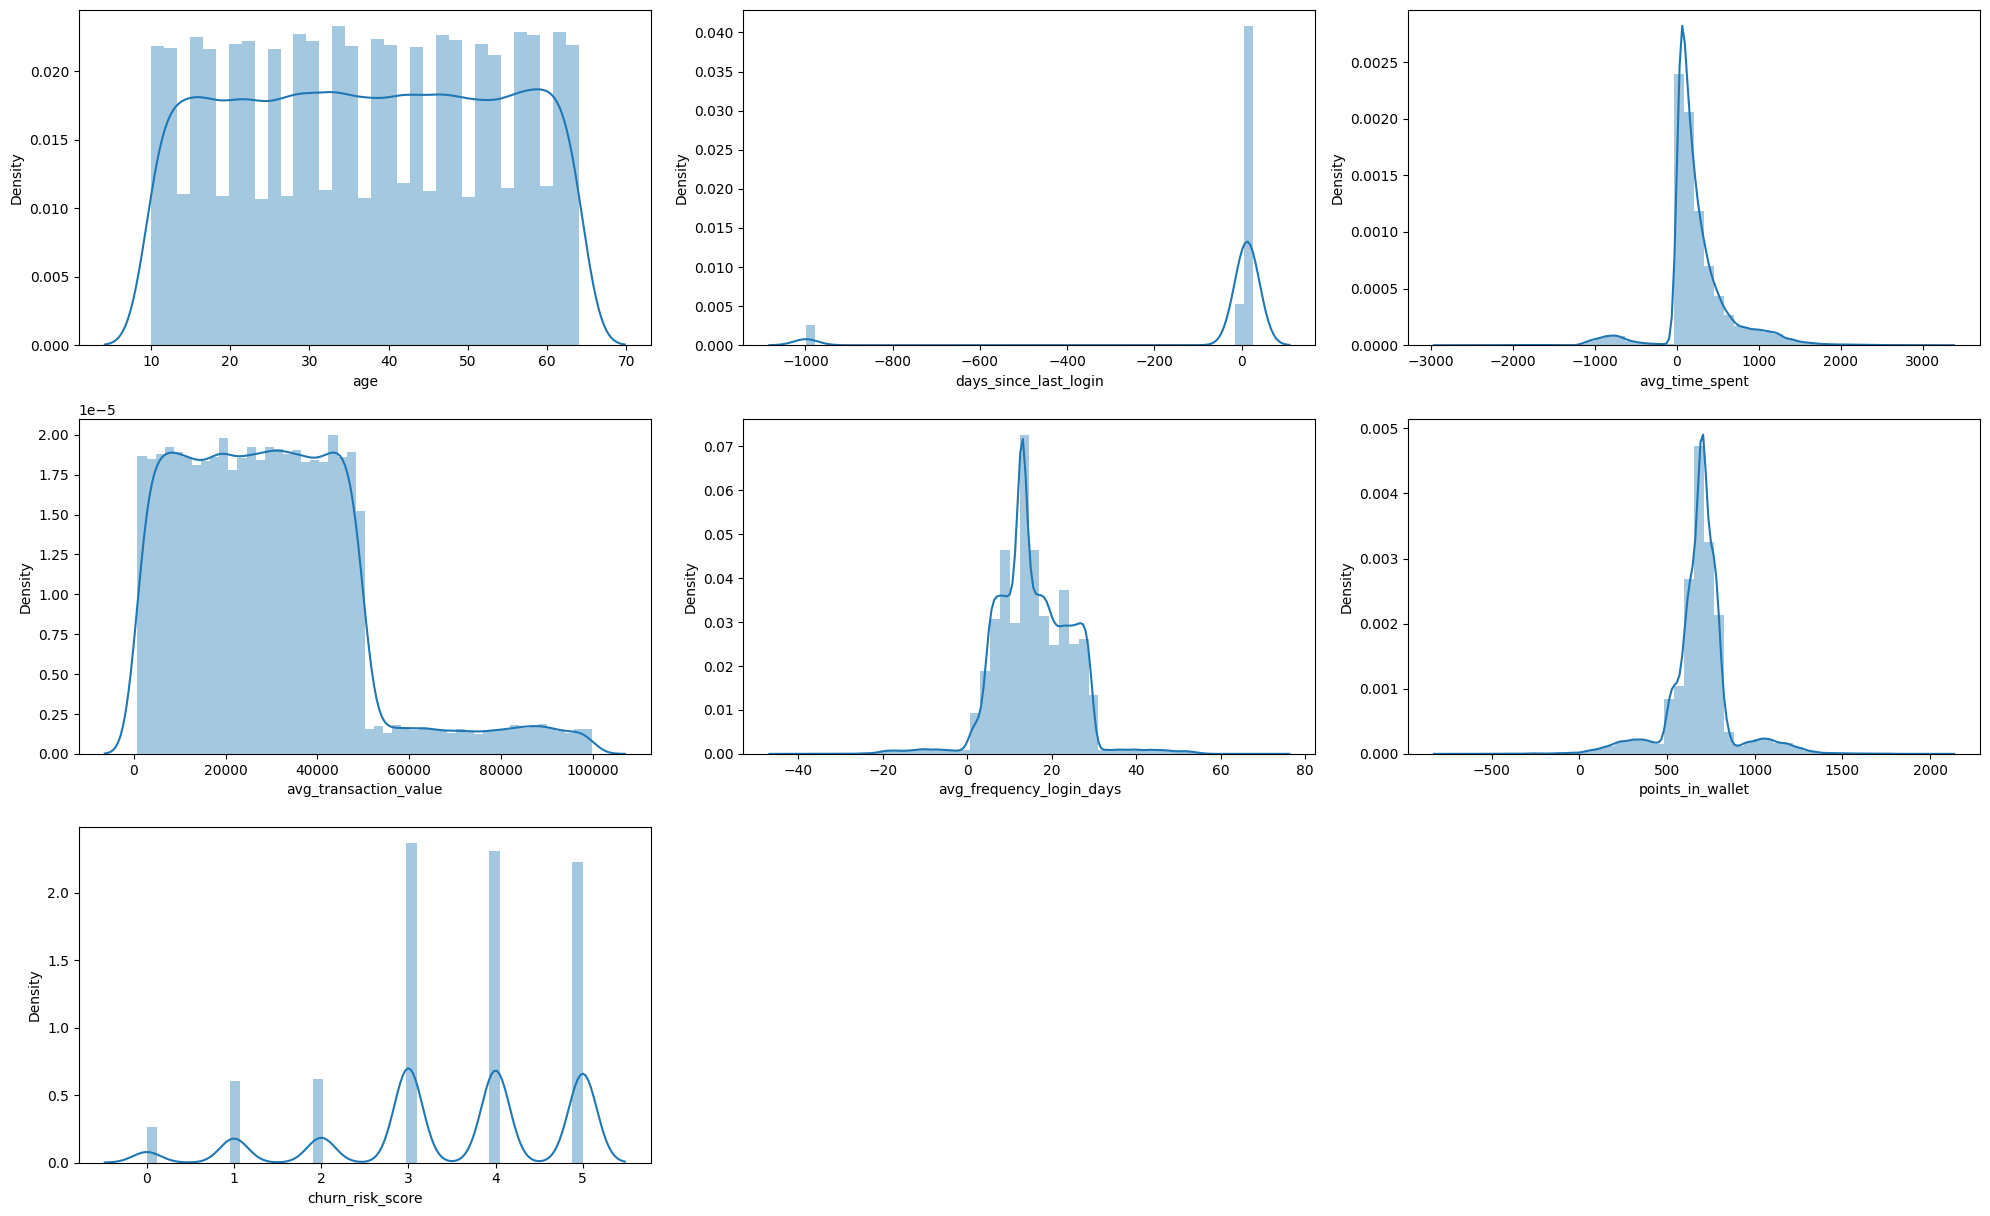

In [156]:
plt.figure(figsize=(20,20), facecolor='white')
i = 1

for features in selected_features_2:
    if i <= 15:
        ax = plt.subplot(5,3,i)
        sns.distplot(selected_features_2[features]) # distplot has been depricated for the latest version but it can be useful to show the distribution and histogram on the same plot.
        plt.xlabel(features, fontsize = 10)
        
    i+=1
plt.tight_layout()

In [157]:
# Remove outliers observed in column / features such as days_since_last_login, avg_time_spent, and avg_frequency_login_days 
for x in df.index:
    if df.loc[x, "days_since_last_login"] < 0:
        df.drop(x, inplace=True)
# extream outlier was removed

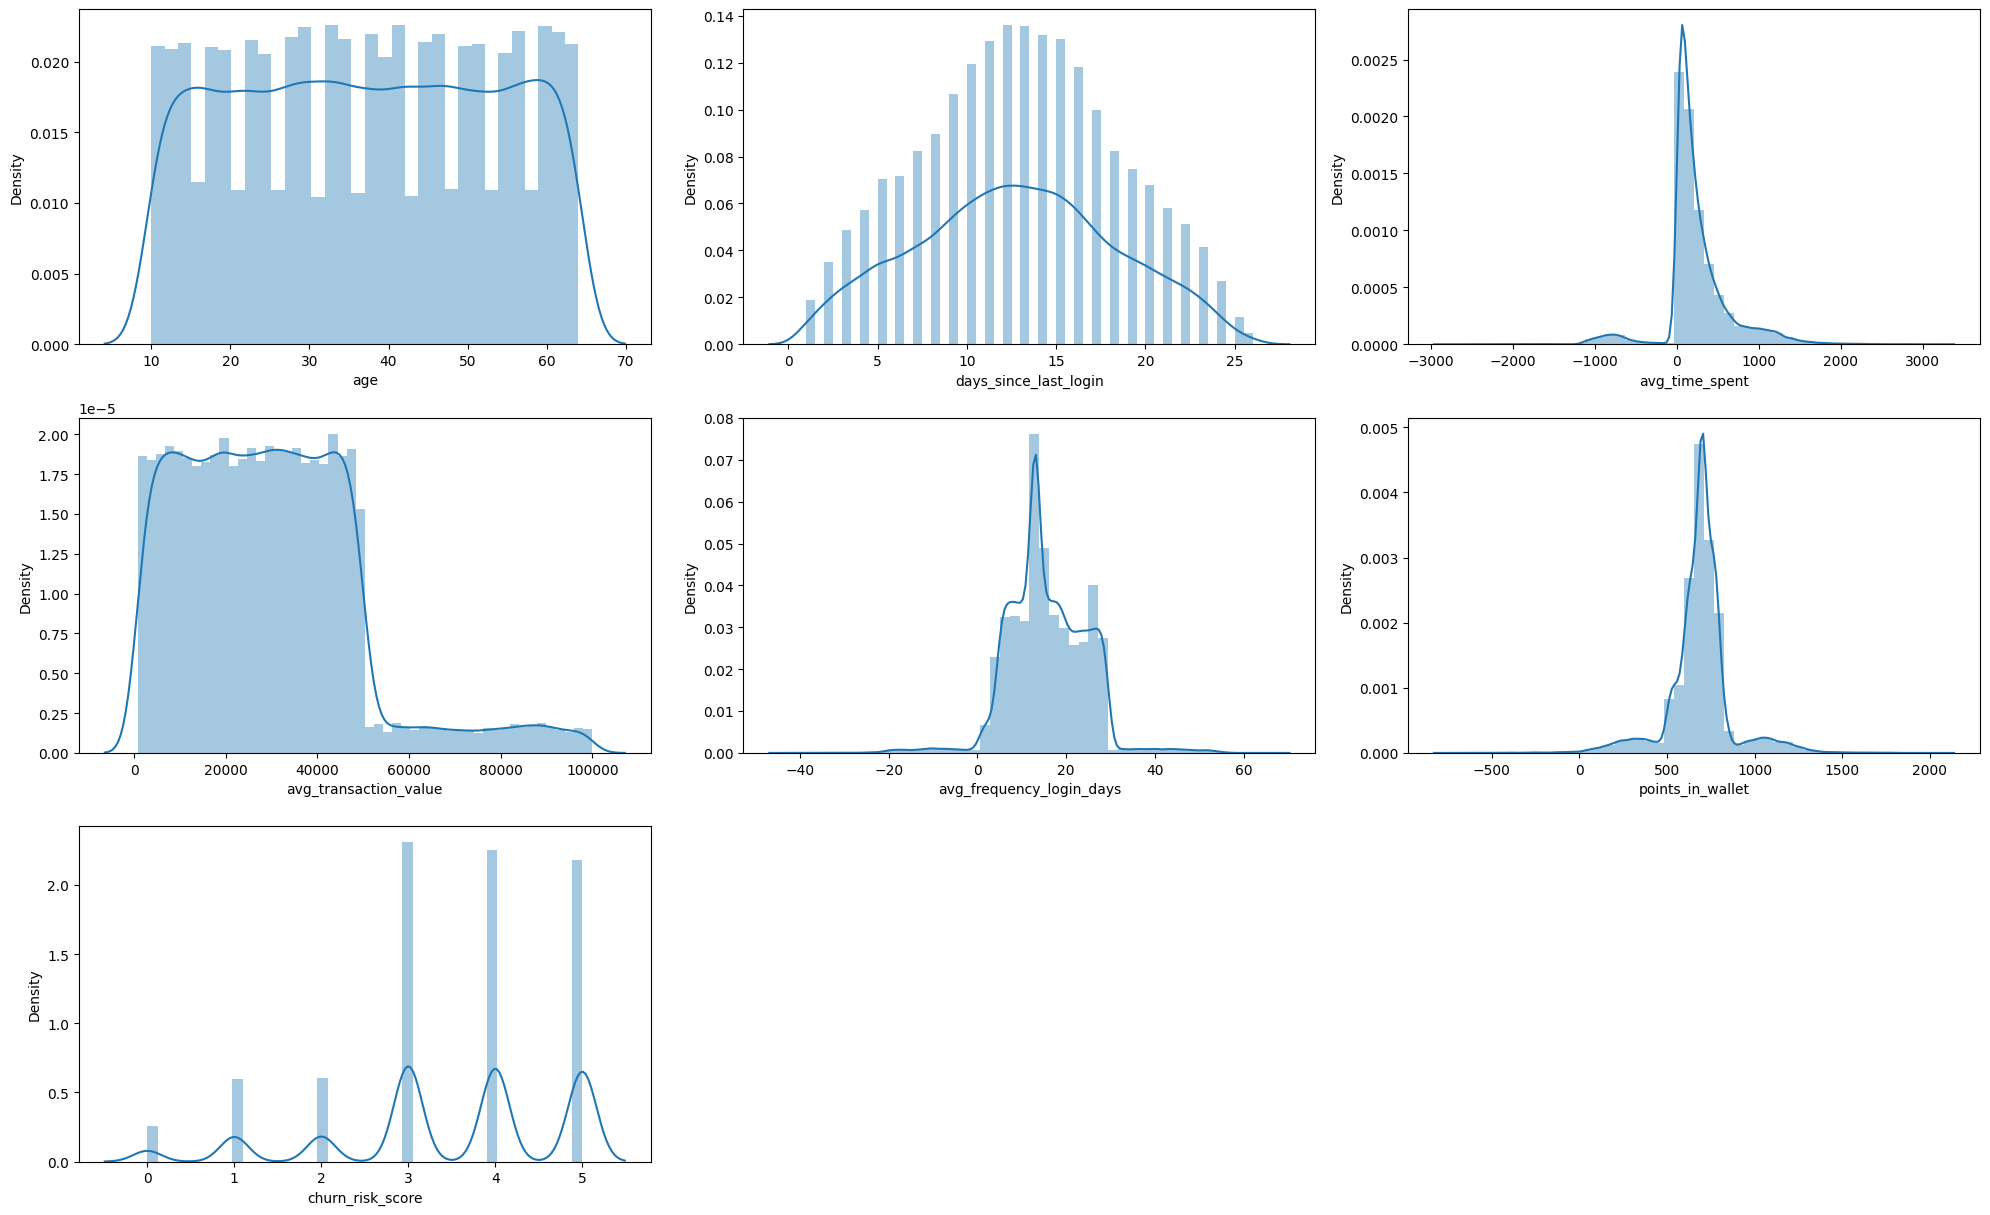

In [158]:
df_selected = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']]
plt.figure(figsize=(20,20), facecolor='white')
i = 1

for features in df_selected:
    if i <= 15:
        ax = plt.subplot(5,3,i)
        sns.distplot(df_selected[features]) # distplot has been depricated for the latest version but it can be useful to show the distribution and histogram on the same plot.
        plt.xlabel(features, fontsize = 10)
        
    i+=1
plt.tight_layout()

Voilà!! Outliers have been impued!!

1.4 Feature Selection

In [165]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Handle non-numeric values in 'avg_frequency_login_days'
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

columns_to_normalize = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Normalize the selected columns
normalized_values = scaler.fit_transform(df[columns_to_normalize])

# Create a DataFrame from the normalized values
normalized_df = pd.DataFrame(normalized_values, columns=columns_to_normalize)

# Calculate the engagement score as the average of the normalized values
df['engagement_score'] = normalized_df.mean(axis=1)
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                    0
joining_year                       0
joining_month                      0
joining_day                        0
membership_category                0
joined_through_referral            0
referral_id                        0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
complaint_status                   0
feedback                           0
churn_risk_score                   0
engagement_score                1889
d

In [169]:
df['engagement_score'].fillna(df['engagement_score'].mean(), inplace=True)
df.isna().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
joining_year                    0
joining_month                   0
joining_day                     0
membership_category             0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
complaint_status                0
feedback                        0
churn_risk_score                0
engagement_score                0
dtype: int64

In [ ]:
# Remove outliers observed in column / features such as days_since_last_login, avg_time_spent, and avg_frequency_login_days 
for x in df.index:
    if df.loc[x, "days_since_last_login"] < 0:
        df.drop(x, inplace=True)
# extream outlier was removed

---

# Step 2 - Exploratory Data Analysis (EDA)

2.1 Statistical Summaries

2.2 Visualization fo some features

<Axes: >

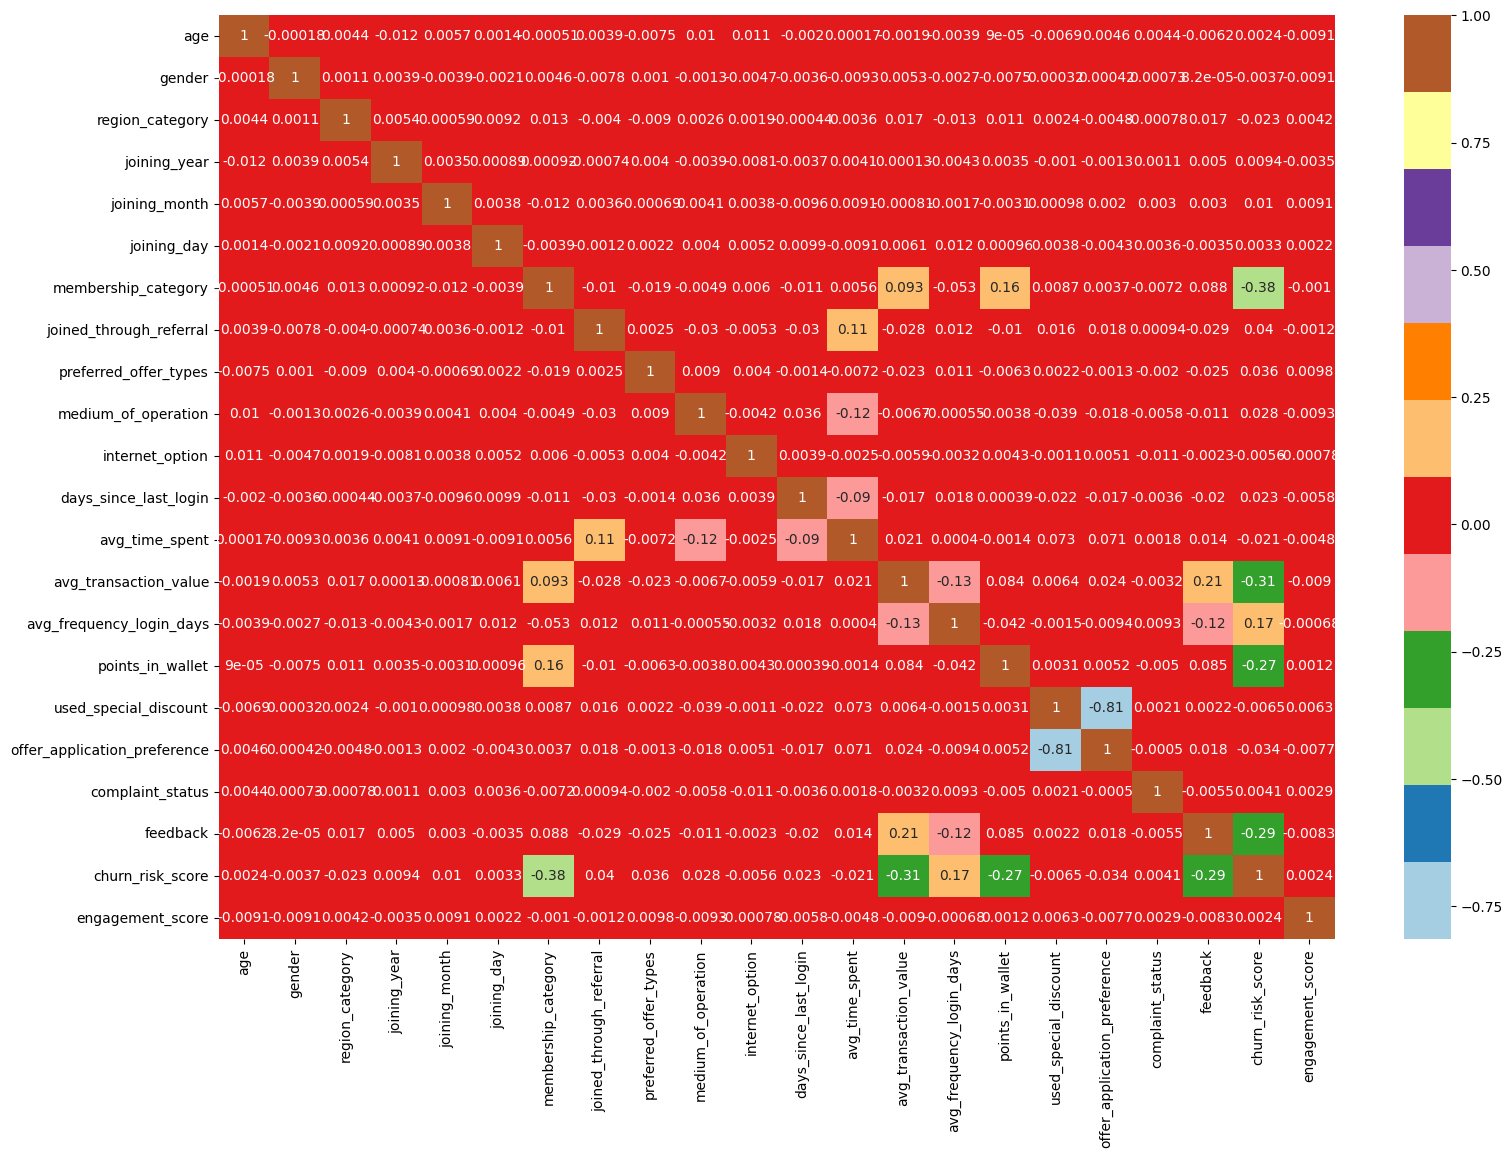

In [171]:
# Heatmap of features to identify relationship and nexus
df_1 = df.select_dtypes(include = ['float64', 'int64', 'int32'])
corr = df_1.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap='Paired', annot=True, robust=False)

2.3 Customer Segmentation Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34993 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   34993 non-null  object 
 1   Name                          34993 non-null  object 
 2   age                           34993 non-null  int64  
 3   gender                        34993 non-null  int64  
 4   security_no                   34993 non-null  object 
 5   region_category               34993 non-null  int64  
 6   joining_year                  34993 non-null  int32  
 7   joining_month                 34993 non-null  int32  
 8   joining_day                   34993 non-null  int32  
 9   membership_category           34993 non-null  int64  
 10  joined_through_referral       34993 non-null  int64  
 11  referral_id                   34993 non-null  object 
 12  preferred_offer_types         34993 non-null  int64  
 13  medium

In [172]:
custormer_segmentation_1 = df[['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral',
                                'preferred_offer_types', 'medium_of_operation', 'internet_option', 'churn_risk_score']]
custormer_segmentation_2 = df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
                                'points_in_wallet', 'used_special_discount', 'offer_application_preference',
                                  'engagement_score', 'churn_risk_score']]

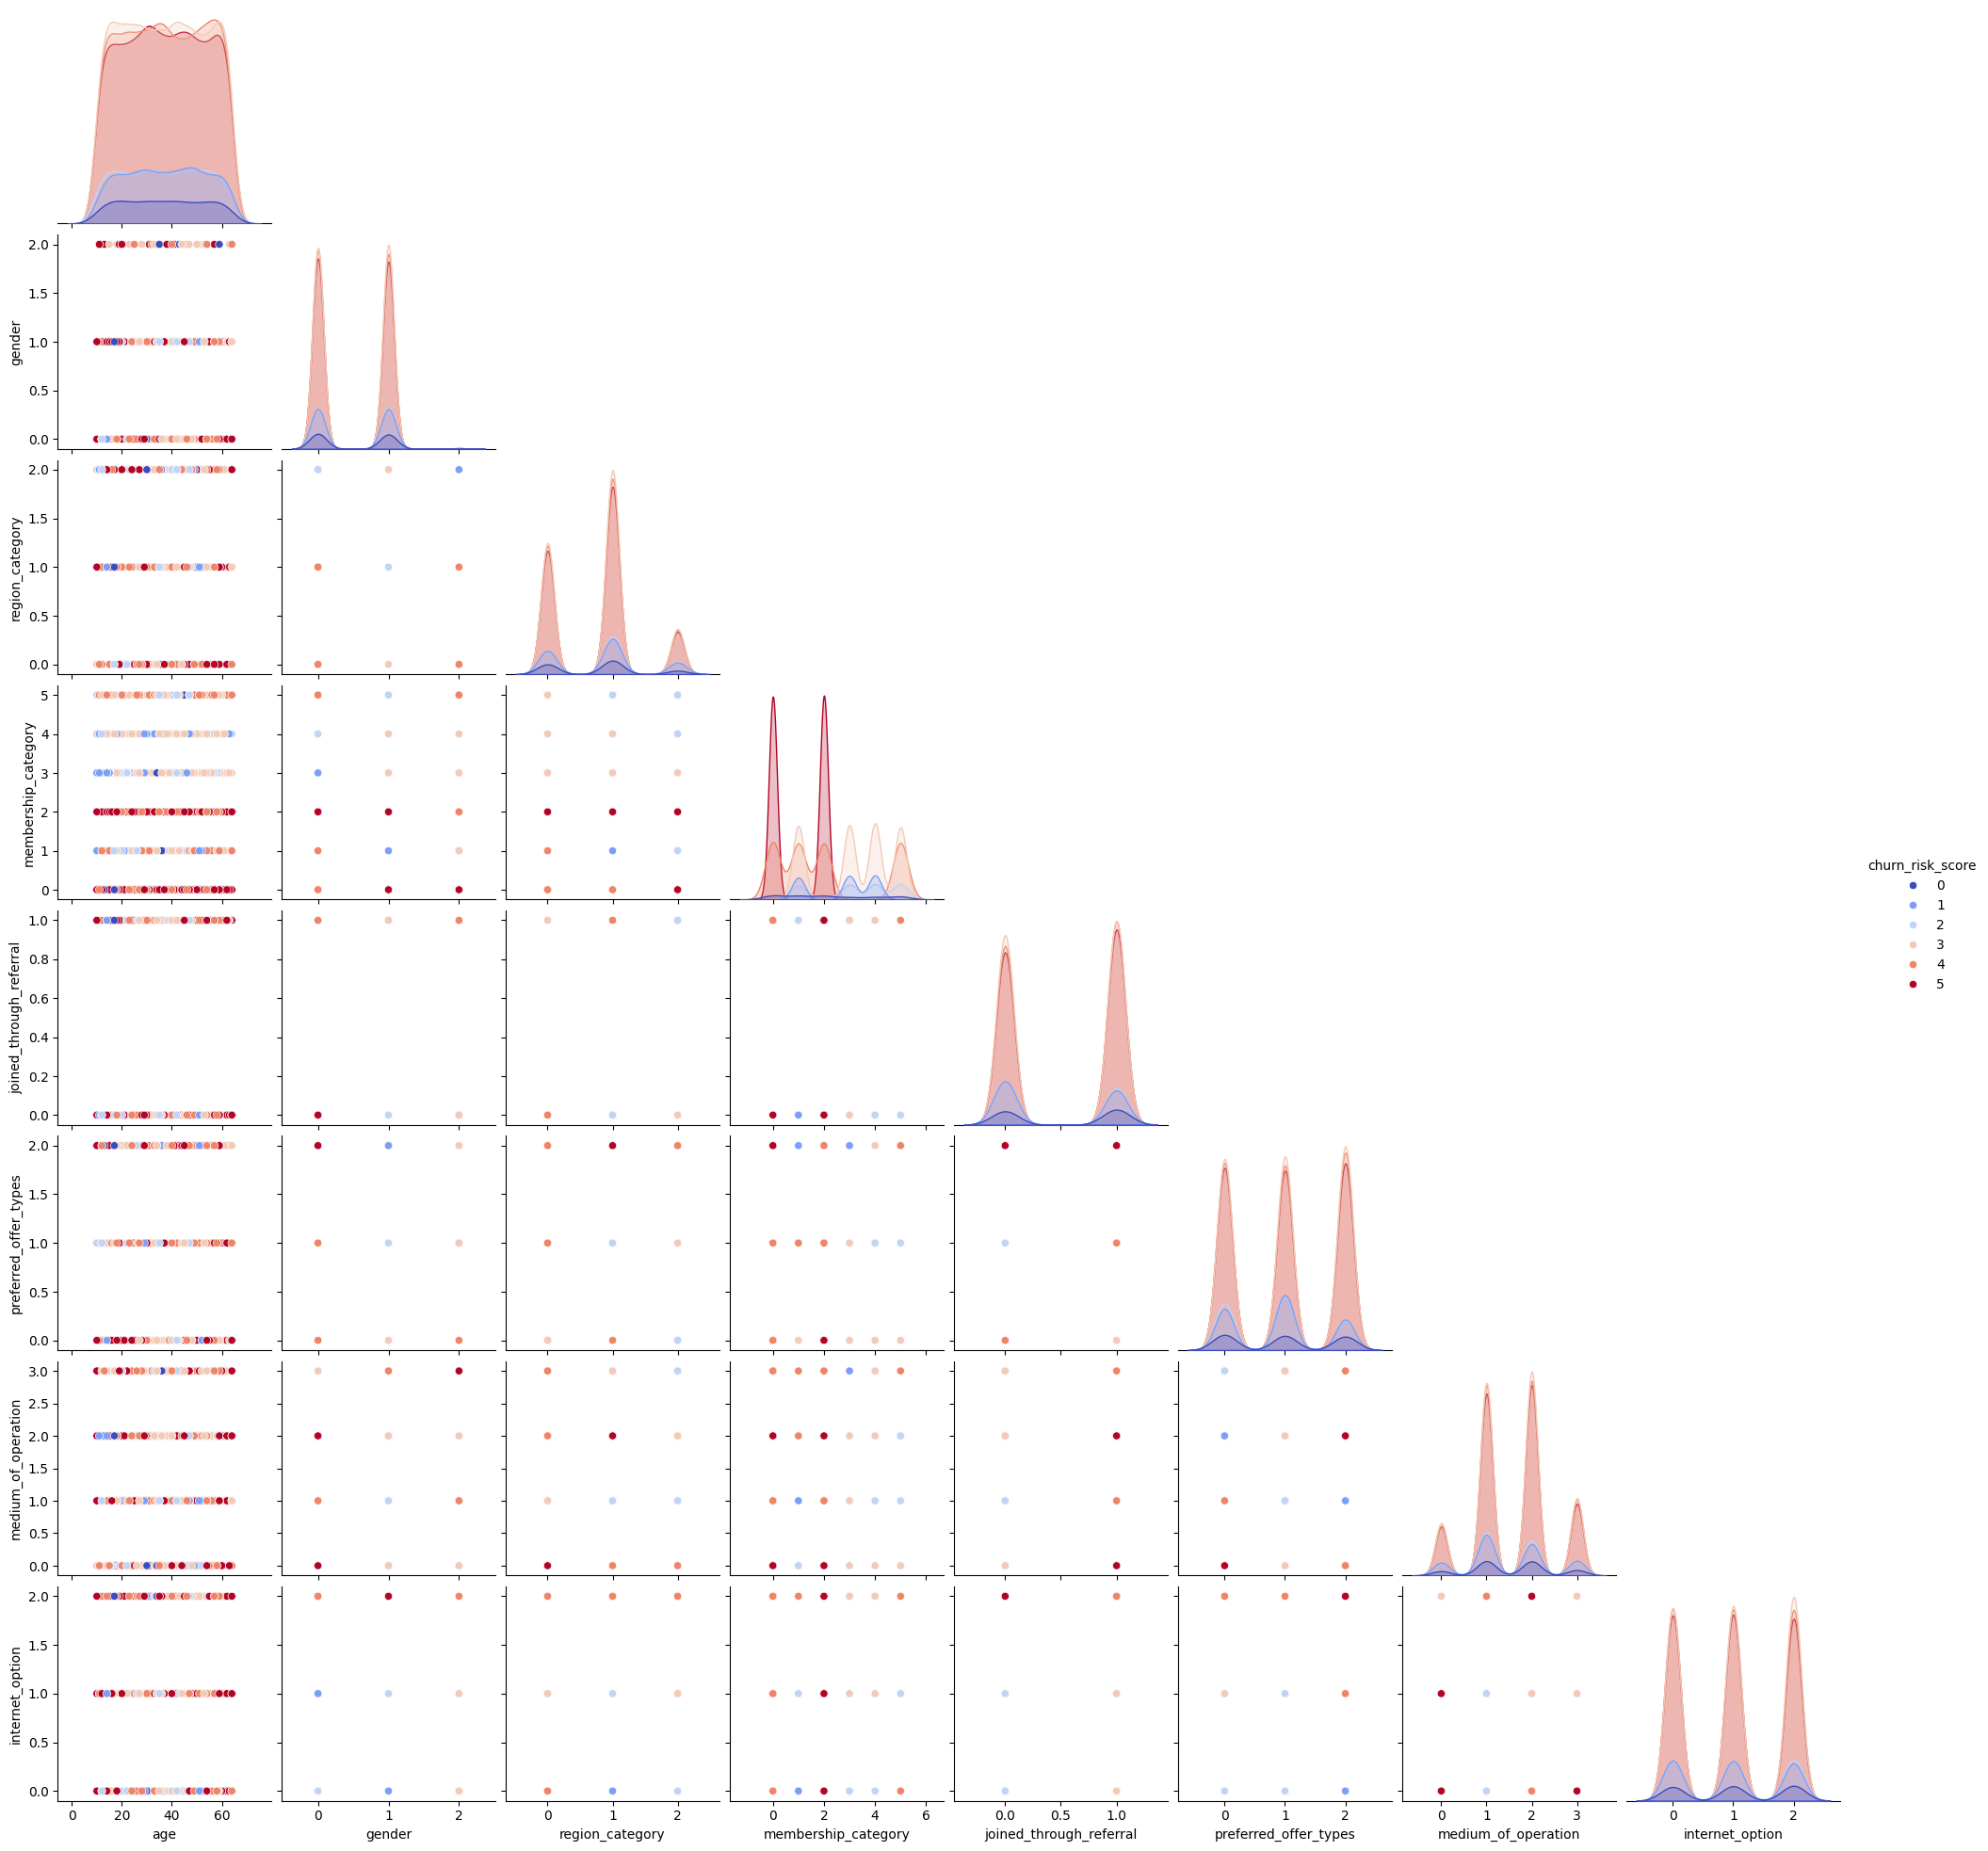

In [173]:
sns.pairplot(custormer_segmentation_1, hue='churn_risk_score', palette='coolwarm', corner=True)

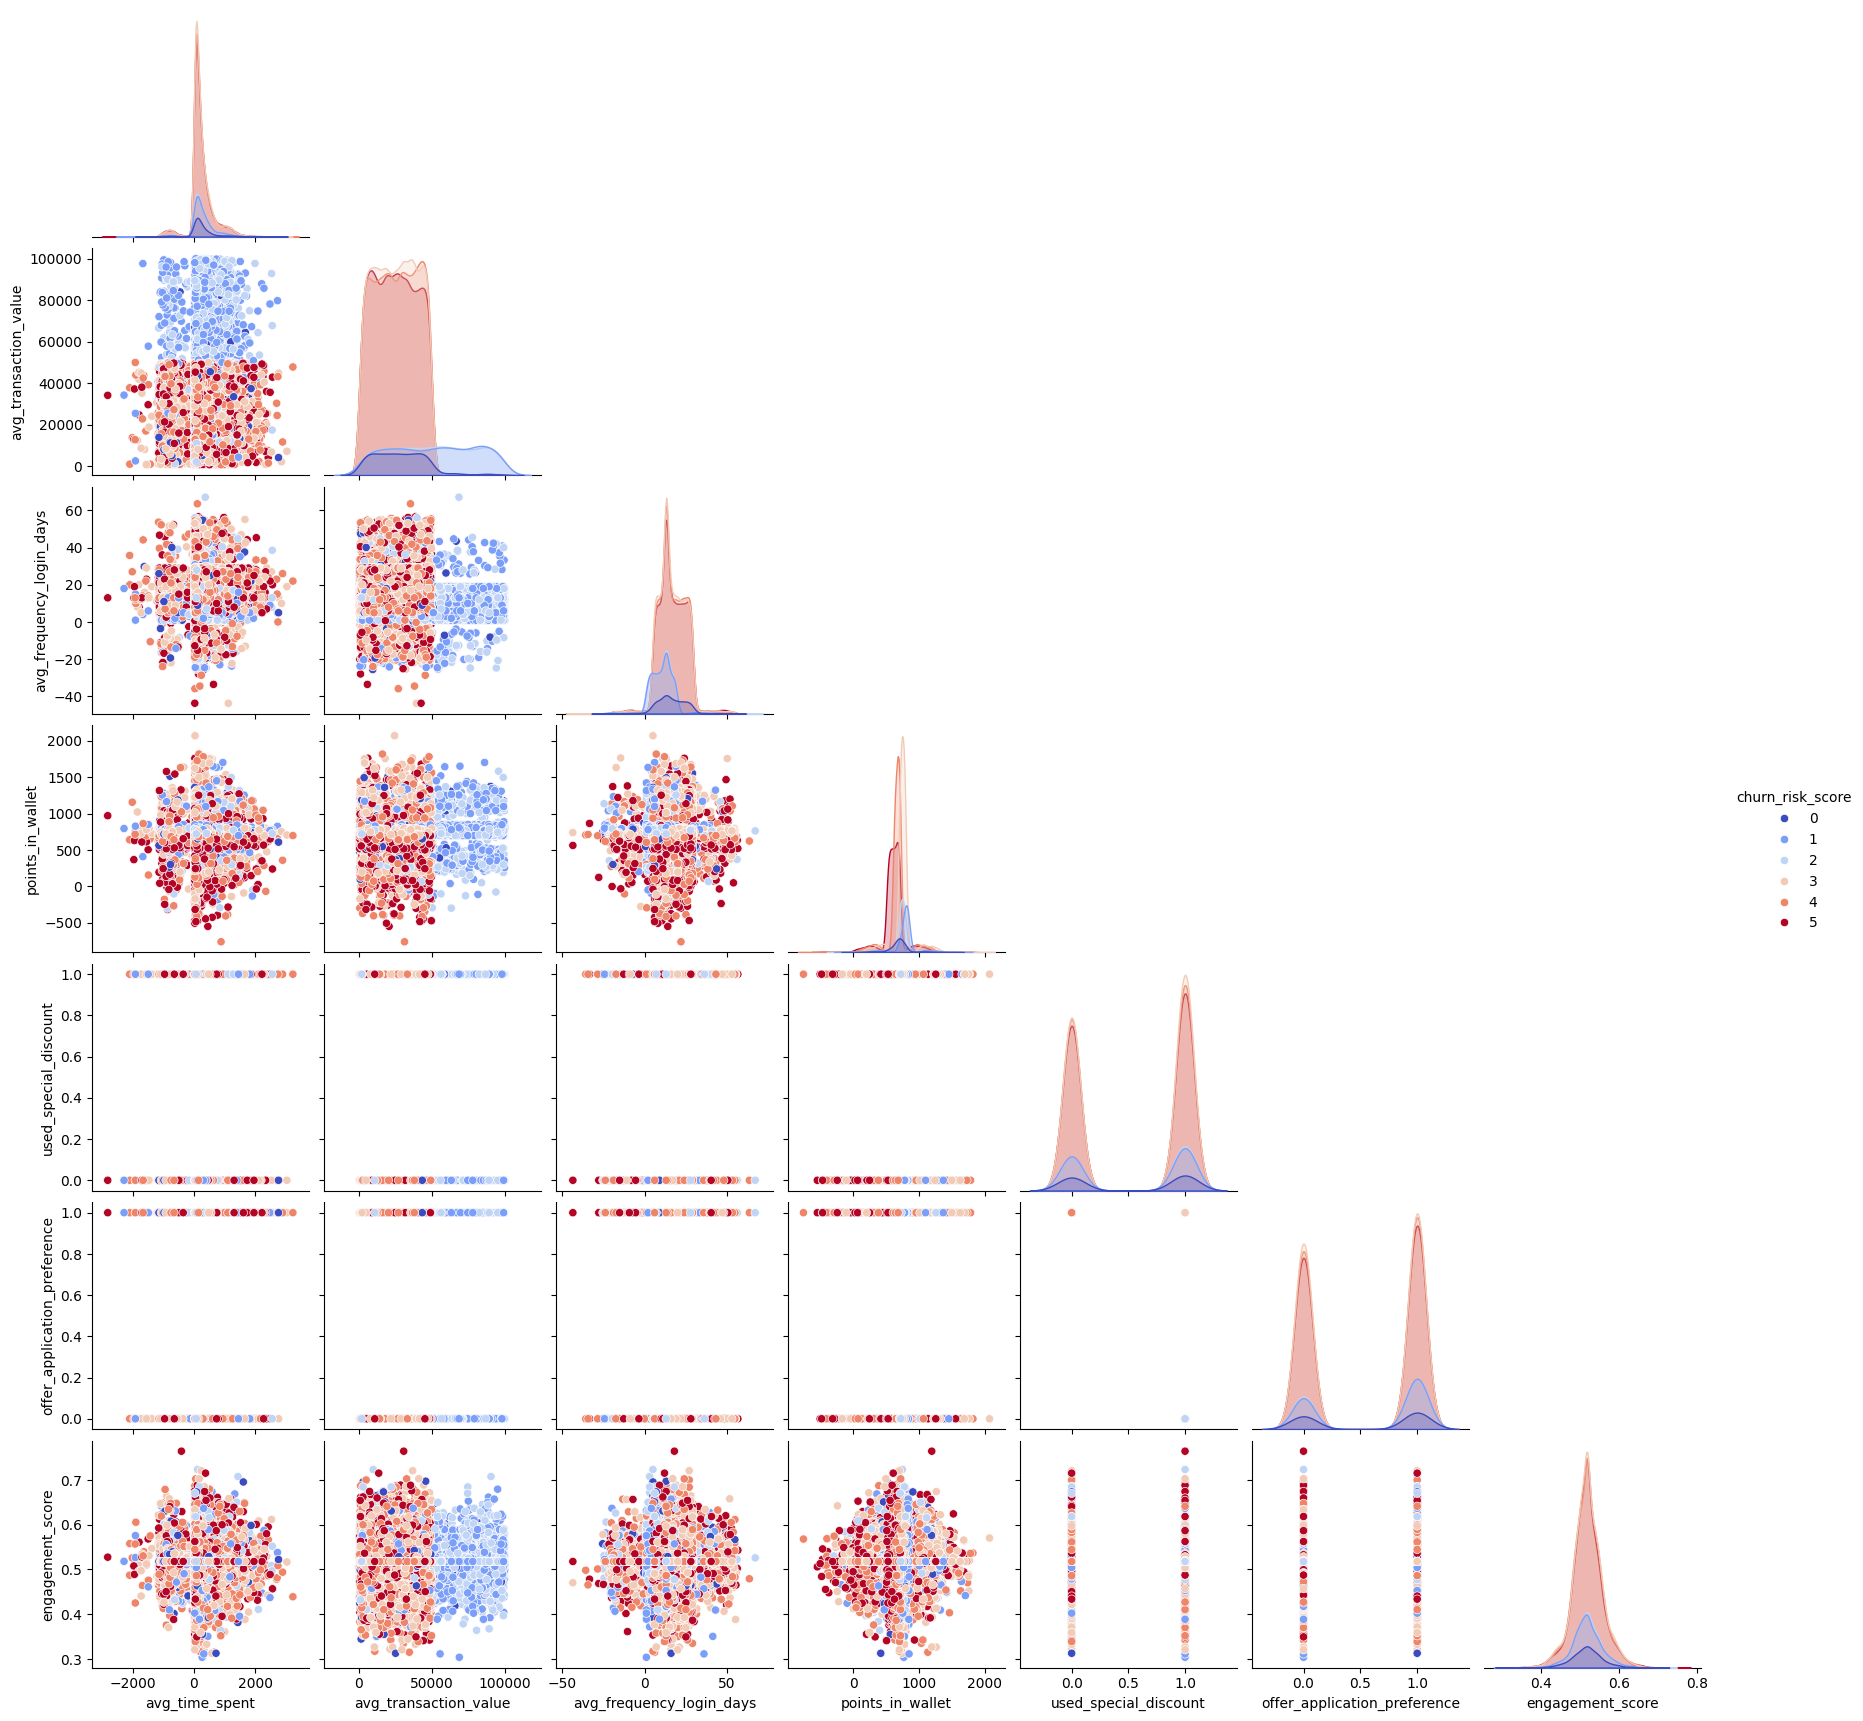

In [174]:
sns.pairplot(custormer_segmentation_2, hue='churn_risk_score', palette='coolwarm', corner=True)
# The pairplot segmentation shows a combination of features in relation to churn scores.
# The pair plots above and below show where the highest and lowest values are concentrated across multiple features

---

# Step 3: Feature Selection and Data Splitting

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34993 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   34993 non-null  object 
 1   Name                          34993 non-null  object 
 2   age                           34993 non-null  int64  
 3   gender                        34993 non-null  int64  
 4   security_no                   34993 non-null  object 
 5   region_category               34993 non-null  int64  
 6   joining_year                  34993 non-null  int32  
 7   joining_month                 34993 non-null  int32  
 8   joining_day                   34993 non-null  int32  
 9   membership_category           34993 non-null  int64  
 10  joined_through_referral       34993 non-null  int64  
 11  referral_id                   34993 non-null  object 
 12  preferred_offer_types         34993 non-null  int64  
 13  medium

In [176]:
# From the heatmap features are not highly related. Therefore using all the features will not lead to overfitting, but just incase irrelevat features will be removed.
# From domain knowledge and reasoning deduction, customer_id, name, security_no, referral_id, and feedback will be removed.
df_final = df.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id', 'feedback'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34993 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           34993 non-null  int64  
 1   gender                        34993 non-null  int64  
 2   region_category               34993 non-null  int64  
 3   joining_year                  34993 non-null  int32  
 4   joining_month                 34993 non-null  int32  
 5   joining_day                   34993 non-null  int32  
 6   membership_category           34993 non-null  int64  
 7   joined_through_referral       34993 non-null  int64  
 8   preferred_offer_types         34993 non-null  int64  
 9   medium_of_operation           34993 non-null  int64  
 10  internet_option               34993 non-null  int64  
 11  last_visit_time               34993 non-null  object 
 12  days_since_last_login         34993 non-null  int64  
 13  avg_ti

3.2 Data Splitting

In [177]:
X = df_final.drop(columns=['churn_risk_score', 'last_visit_time'])
Y = df_final['churn_risk_score']
X.isna().sum()

age                             0
gender                          0
region_category                 0
joining_year                    0
joining_month                   0
joining_day                     0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
complaint_status                0
engagement_score                0
dtype: int64

In [178]:
# important feature using extratreeregressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

[0.02765508 0.01315622 0.01771762 0.0162748  0.02615513 0.02772169
 0.41180318 0.01157559 0.01652172 0.02022032 0.01735982 0.02745592
 0.02740742 0.13978394 0.04149726 0.09076733 0.00826518 0.00780373
 0.02097707 0.02988098]


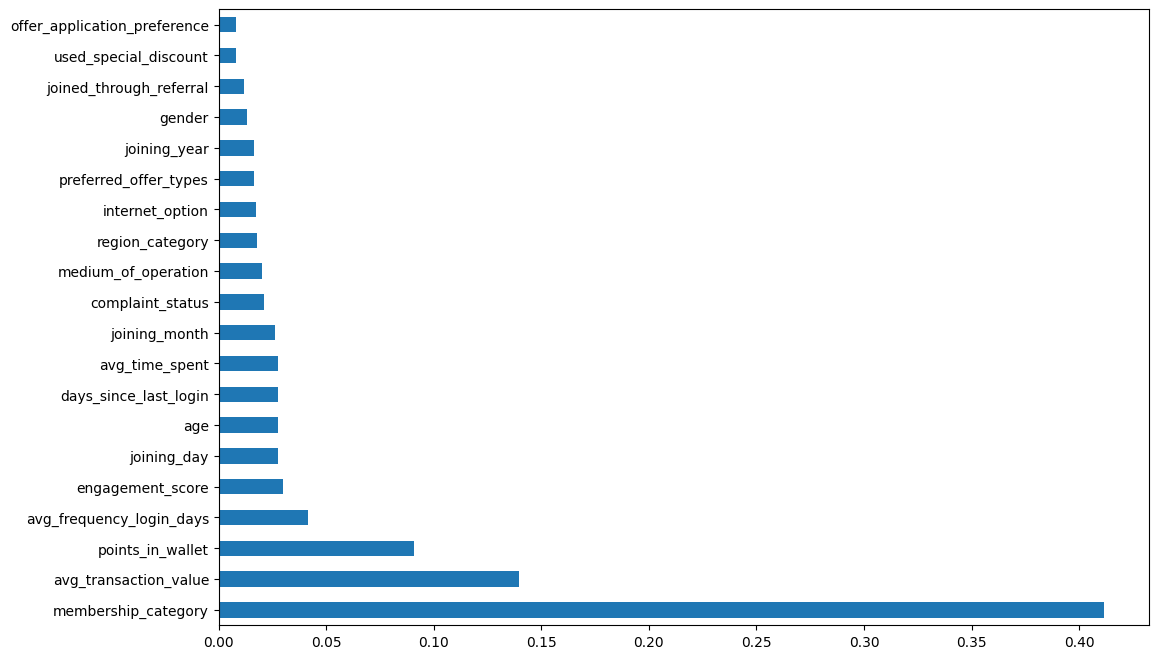

In [181]:
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [183]:
# XGBoost clasifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [185]:
# checking accuracy of train dataset
print("testing accuracy is : ", xg.score(x_train, y_train)*100)

testing accuracy is :  92.15546188468957


In [184]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  71.51021574510644


# Hyperparameter tuning

In [186]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [187]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [188]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.723 total time=   4.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.718 total time=   3.8s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.715 total time=   4.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.715 total time=   4.2s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.709 total time=   4.1s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.712 total time=   1.6s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.706 total time=   1.6s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.714 total time=   1.8s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.709 total time=   1.6s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=0.701 tot

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [189]:
grid.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

In [190]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [191]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  72.3674810687241
